
# 2D NMR Processing and Display

a simplified environment for processing 2D Bruker NMR datasets with `SPIKE`.

Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).

Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.

The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.

***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment ( tested with python 3.7 - [anaconda](https://www.anaconda.com/))*
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.21 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.6* )
- [`ipyml`](https://github.com/matplotlib/jupyter-matplotlib)  ( *adds interactivity in the notebook* )

## Initialization
the following cell should be run only once, at the beginning of the processing

## STARTING Environment...


          SPIKE
    Version     : 0.99.29
    Date        : 20-09-2021
    Revision Id : 529
*** zoom3D not loaded ***
plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 
plugins loaded:
msapmin, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
*** PALMA not loaded ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  Integrate,  apmin, 

Interactive module version, 1.2.1
Run date: 2021-09-20T22:30:00.075239

Interactive module version, 1.2.1


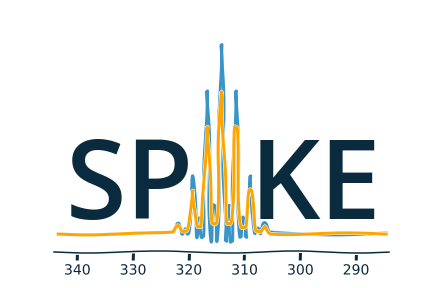

## ...program is Ready

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
from IPython.display import display, HTML, Markdown, Image
display(Markdown('## STARTING Environment...'))
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import os.path as op
import spike
from spike.File.BrukerNMR import Import_2D
from spike.Interactive import INTER as I
from spike.Interactive import INTER_2D as I2D
from spike.Interactive.ipyfilechooser import FileChooser
print("\nInteractive module version,",I.__version__)
from datetime import datetime
print('Run date:', datetime.now().isoformat() )
I.initialize()
display(Markdown('## ...program is Ready'))
from importlib import reload  # the two following lines are debugging help

# configurable items - you may change them to fit you preferences
verbose = 1                              # chose from 0 (terse) to 3 more verbose
mpl.rcParams['figure.figsize'] = (8,4)   # (X,Y) default figure size
I.Activate_Wheel = True                  # True/False    scale with wheel control in the graphic cells 
I.reverse_scroll = False                 # inverse the direction of the mouse wheel, whether it is `True` (TrackPad) or `False` (Mouse)

---

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- After the selection, the selected filename is found in `FC.selected`

In [3]:
FC = FileChooser(path='/DATA/',filename='ser')
display(FC)

FileChooser(path='/DATA', filename='ser', show_hidden='False')

### Import dataset

This is simply done with the `Import_2D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable called d2. 

In [4]:
print('Reading file ',FC.selected)
d2 = Import_2D(FC.selected)
d2.filename = FC.selected
d2.pulprog = d2.params['acqu']['$PULPROG']
print(d2)                                      # print() of the dataset shows a summary of the parameters
print(d2.pulprog)
display(HTML('<b>title: </b>'+ d2.params['acqu']['title']))    # d1.params is a dictionary which contains the whole 'acqu' and 'proc' Bruker parameters
#d2.set_unit('sec').display(title="%s %s"%(FC.nmrname,d2.pulprog), scale='auto')
plt.figure()
plt.imshow(d2.get_buffer().real, cmap="seismic");

Reading file  /DATA/ARTEref/10/ser
2D data-set
Axis F1 :NMR axis at 700.163291 MHz, 256 complex pairs,  from -1.310430 ppm (-917.514982 Hz) to 10.711770 ppm  (7499.988138 Hz)
Axis F2: NMR axis at 700.163291 MHz, 2048 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is hypercomplex (order 2)
<cosydfph>


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

*Check Proc1DNMR NoteBook for documentation on spectral display*

## Basic Processing
We are going to use a basic processing set-up, check the documentation for advanced processing

### Fourier Transform - modulus mode!

Show2D(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Positive', layout=Layout(widt…

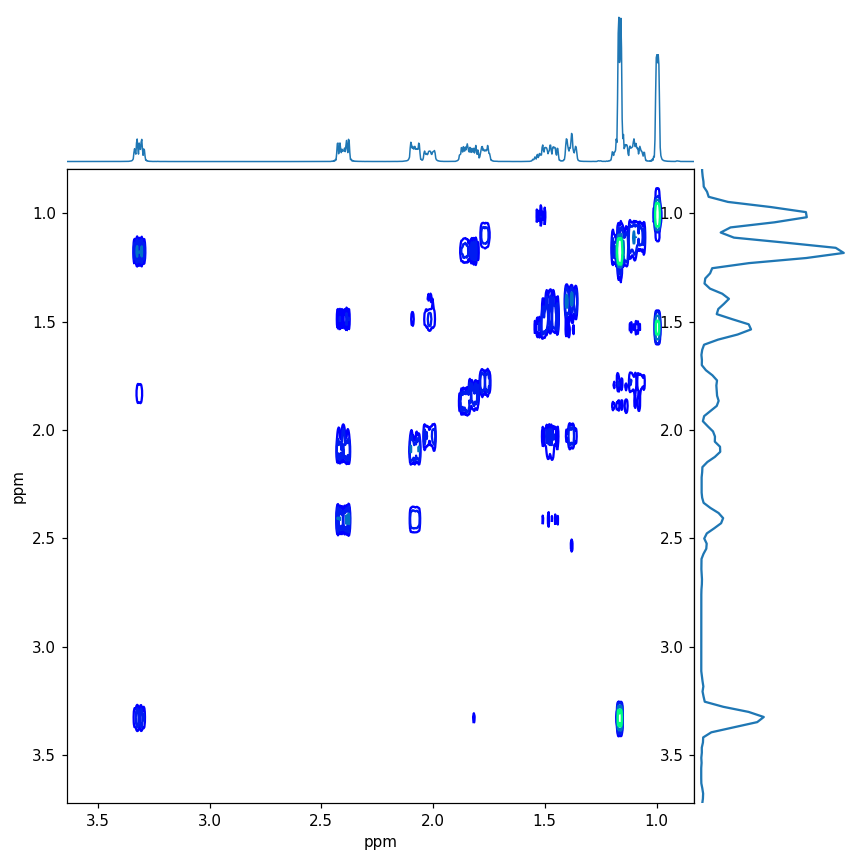

In [5]:
D2 = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2.apod_sin(maxi=0.5,axis='F2').zf(1,2).bk_ftF2()  # chaining  apodisation - zerofill - FT
D2.apod_sin(maxi=0.5,axis='F1').zf(2,1).bk_ftF1()  # chaining  apodisation - zerofill - FT
D2.modulus().set_unit('ppm').rem_ridge()
#D2.display(scale="auto", autoscalethresh=100.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display
I2D.Show2D(D2)

### Advanced Phase sensitive processing



Show2D(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Positive', layout=Layout(widt…

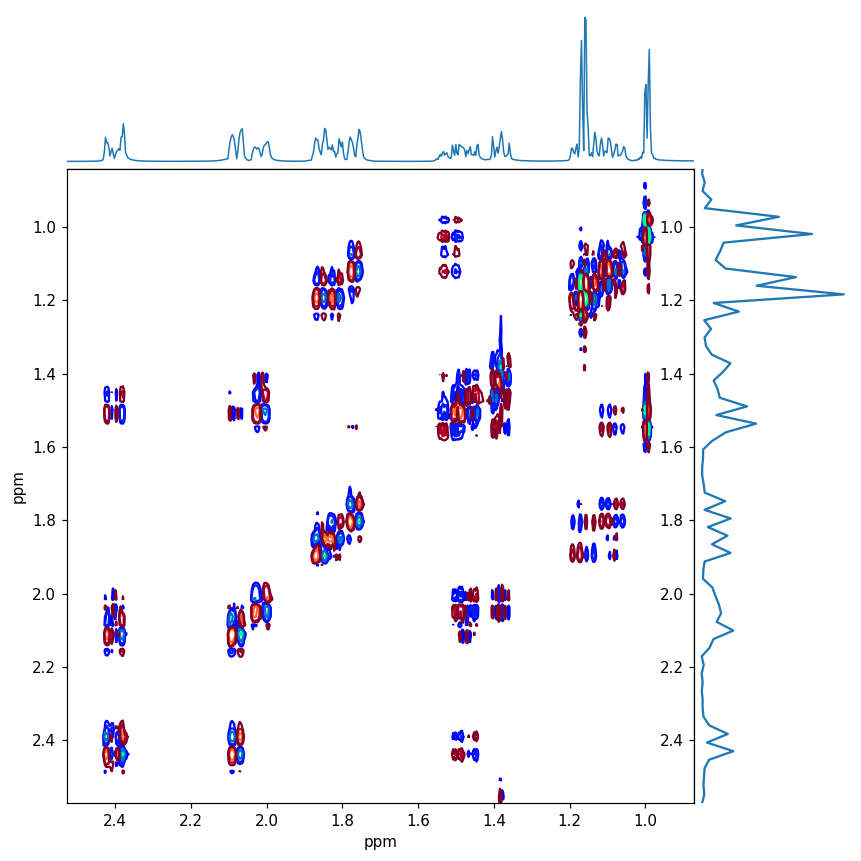

In [6]:
D2ph = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2ph.apod_sin(maxi=0,axis='F2').zf(1,2).bk_ftF2().bk_pk()  # chaining  apodisation - zerofill - FT - phase
D2ph.apod_sin(maxi=0,axis='F1').zf(2,1).bk_ftF1()  # chaining  apodisation - zerofill - FT
D2ph.set_unit('ppm').rem_ridge()
#D2.display(scale="auto",  autoscalethresh=6.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display
S = I2D.Show2D(D2ph)           # note that you can create the view and store it in a var without displaying it
S.negview.value = True         # and set some parameters (here negative view) before display
S

### Rephasing

Use the sliders to adjust the phase parameters,   the pivot can be set with a right click on the spectrum
Top and Side spectra are taken at the pivot level.



Phaser2D(children=(VBox(children=(GridBox(children=(HTML(value='<b>F1</b>'), HTML(value='<b>F2</b>'), FloatSli…

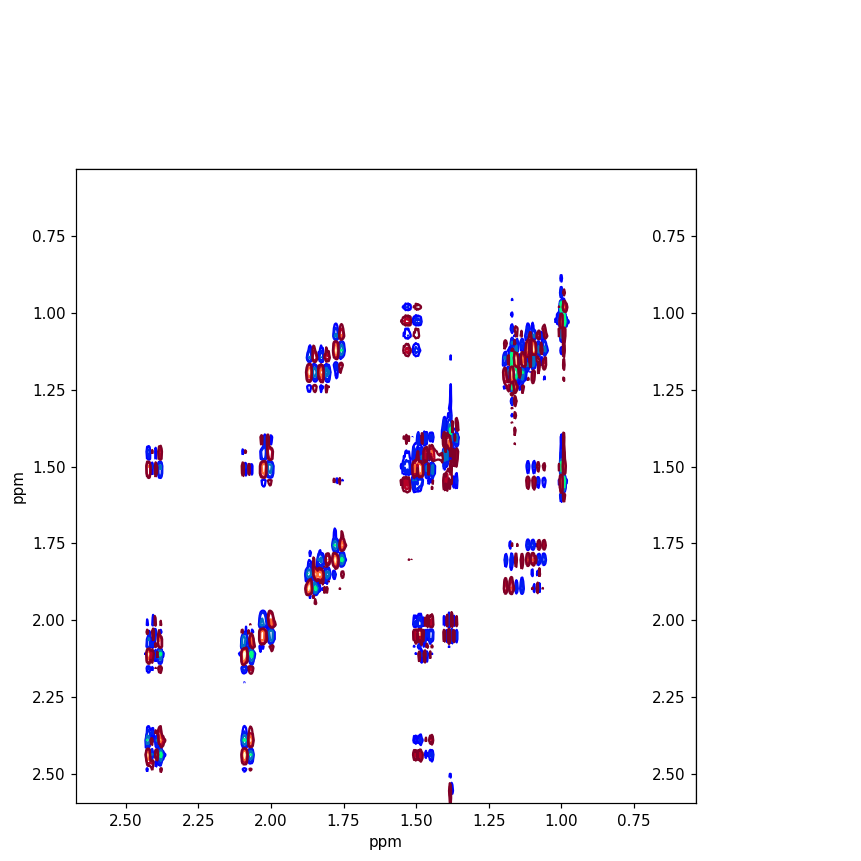

In [21]:
reload(I2D)
P = I2D.Phaser2D(D2ph)
P

# An interactive Display
- show2D +
- projections
- color maps
- title

# todo
- peak picking

In [22]:
F1slice = 3.3    # select a F1 (vertical) slice in current unit (here ppm) 
F2slice = 2.05   # select a F2 (horizontal) slice in current unit (here ppm) 

D2ph.col( D2ph.axis2.ctoi(F1slice)).display(title='F1 slice at F2=%.3f ppm'%(F1slice,))
D2ph.row( D2ph.axis1.ctoi(F2slice)).display(title='F2 slice at F1=%.3f ppm'%(F2slice,))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1D data-set
Axis F1 :NMR axis at 700.163291 MHz, 4096 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [ ]:
D2.set_unit('ppm')
b = I2D.Show2D(D2.copy().real(axis='F1').real(axis='F2'), title="%s %s"%(FC.nmrname,d2.pulprog))

## Save on disk

In [ ]:
D2.save('example1.gs2')

# The following entries or not finished yet

## Peak-Picker
- moving the threshold determines the minimum peak intensity
- peaks are searched only in the selected zoom window

## Export a bucket list

In [ ]:
# adapt the parameters below
Zoom = ((0.5,8),(0.5,8))                    # zone to bucket       - in ppm
BucketSize = (0.1,0.1)                 # width of the buckets - in ppm
Output = 'screen'                   # 'screen'  or  'file'  determines output
BucketFileName = 'bucket.csv'     #  the filename if Output (above) is 'file'  - don't forget the .csv extension.

In [ ]:
# the following cell executes the bucketing
if Output == 'file':
    with open(BucketFileName,'w') as F:
        D2.bucket2d(zoom=Zoom, bsize=BucketSize, file=F)
    print('buckets written to %s\n'%op.realpath(BucketFileName))
else:
    D2.bucket2d(zoom=Zoom, bsize=BucketSize)

*Tools in this page is under intensive development - don't expect things to remain as they are.*